## Random Forest Classifier
The Random Forest classifier is a powerful and versatile machine learning algorithm used for classification and regression tasks. It operates by constructing multiple decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Here’s a breakdown of how the Random Forest classifier works, along with the key steps involved in its operation:

#### Principle of Random Forest Classifier
Random Forest operates on the principle of ensemble learning, where multiple weak models (in this case, decision trees) combine to form a strong model. Each individual tree in a Random Forest gives a prediction, and the most common output (in classification) or average (in regression) across all trees is considered as the final prediction. This approach helps in reducing variance and avoiding overfitting, which are common issues in individual decision trees.

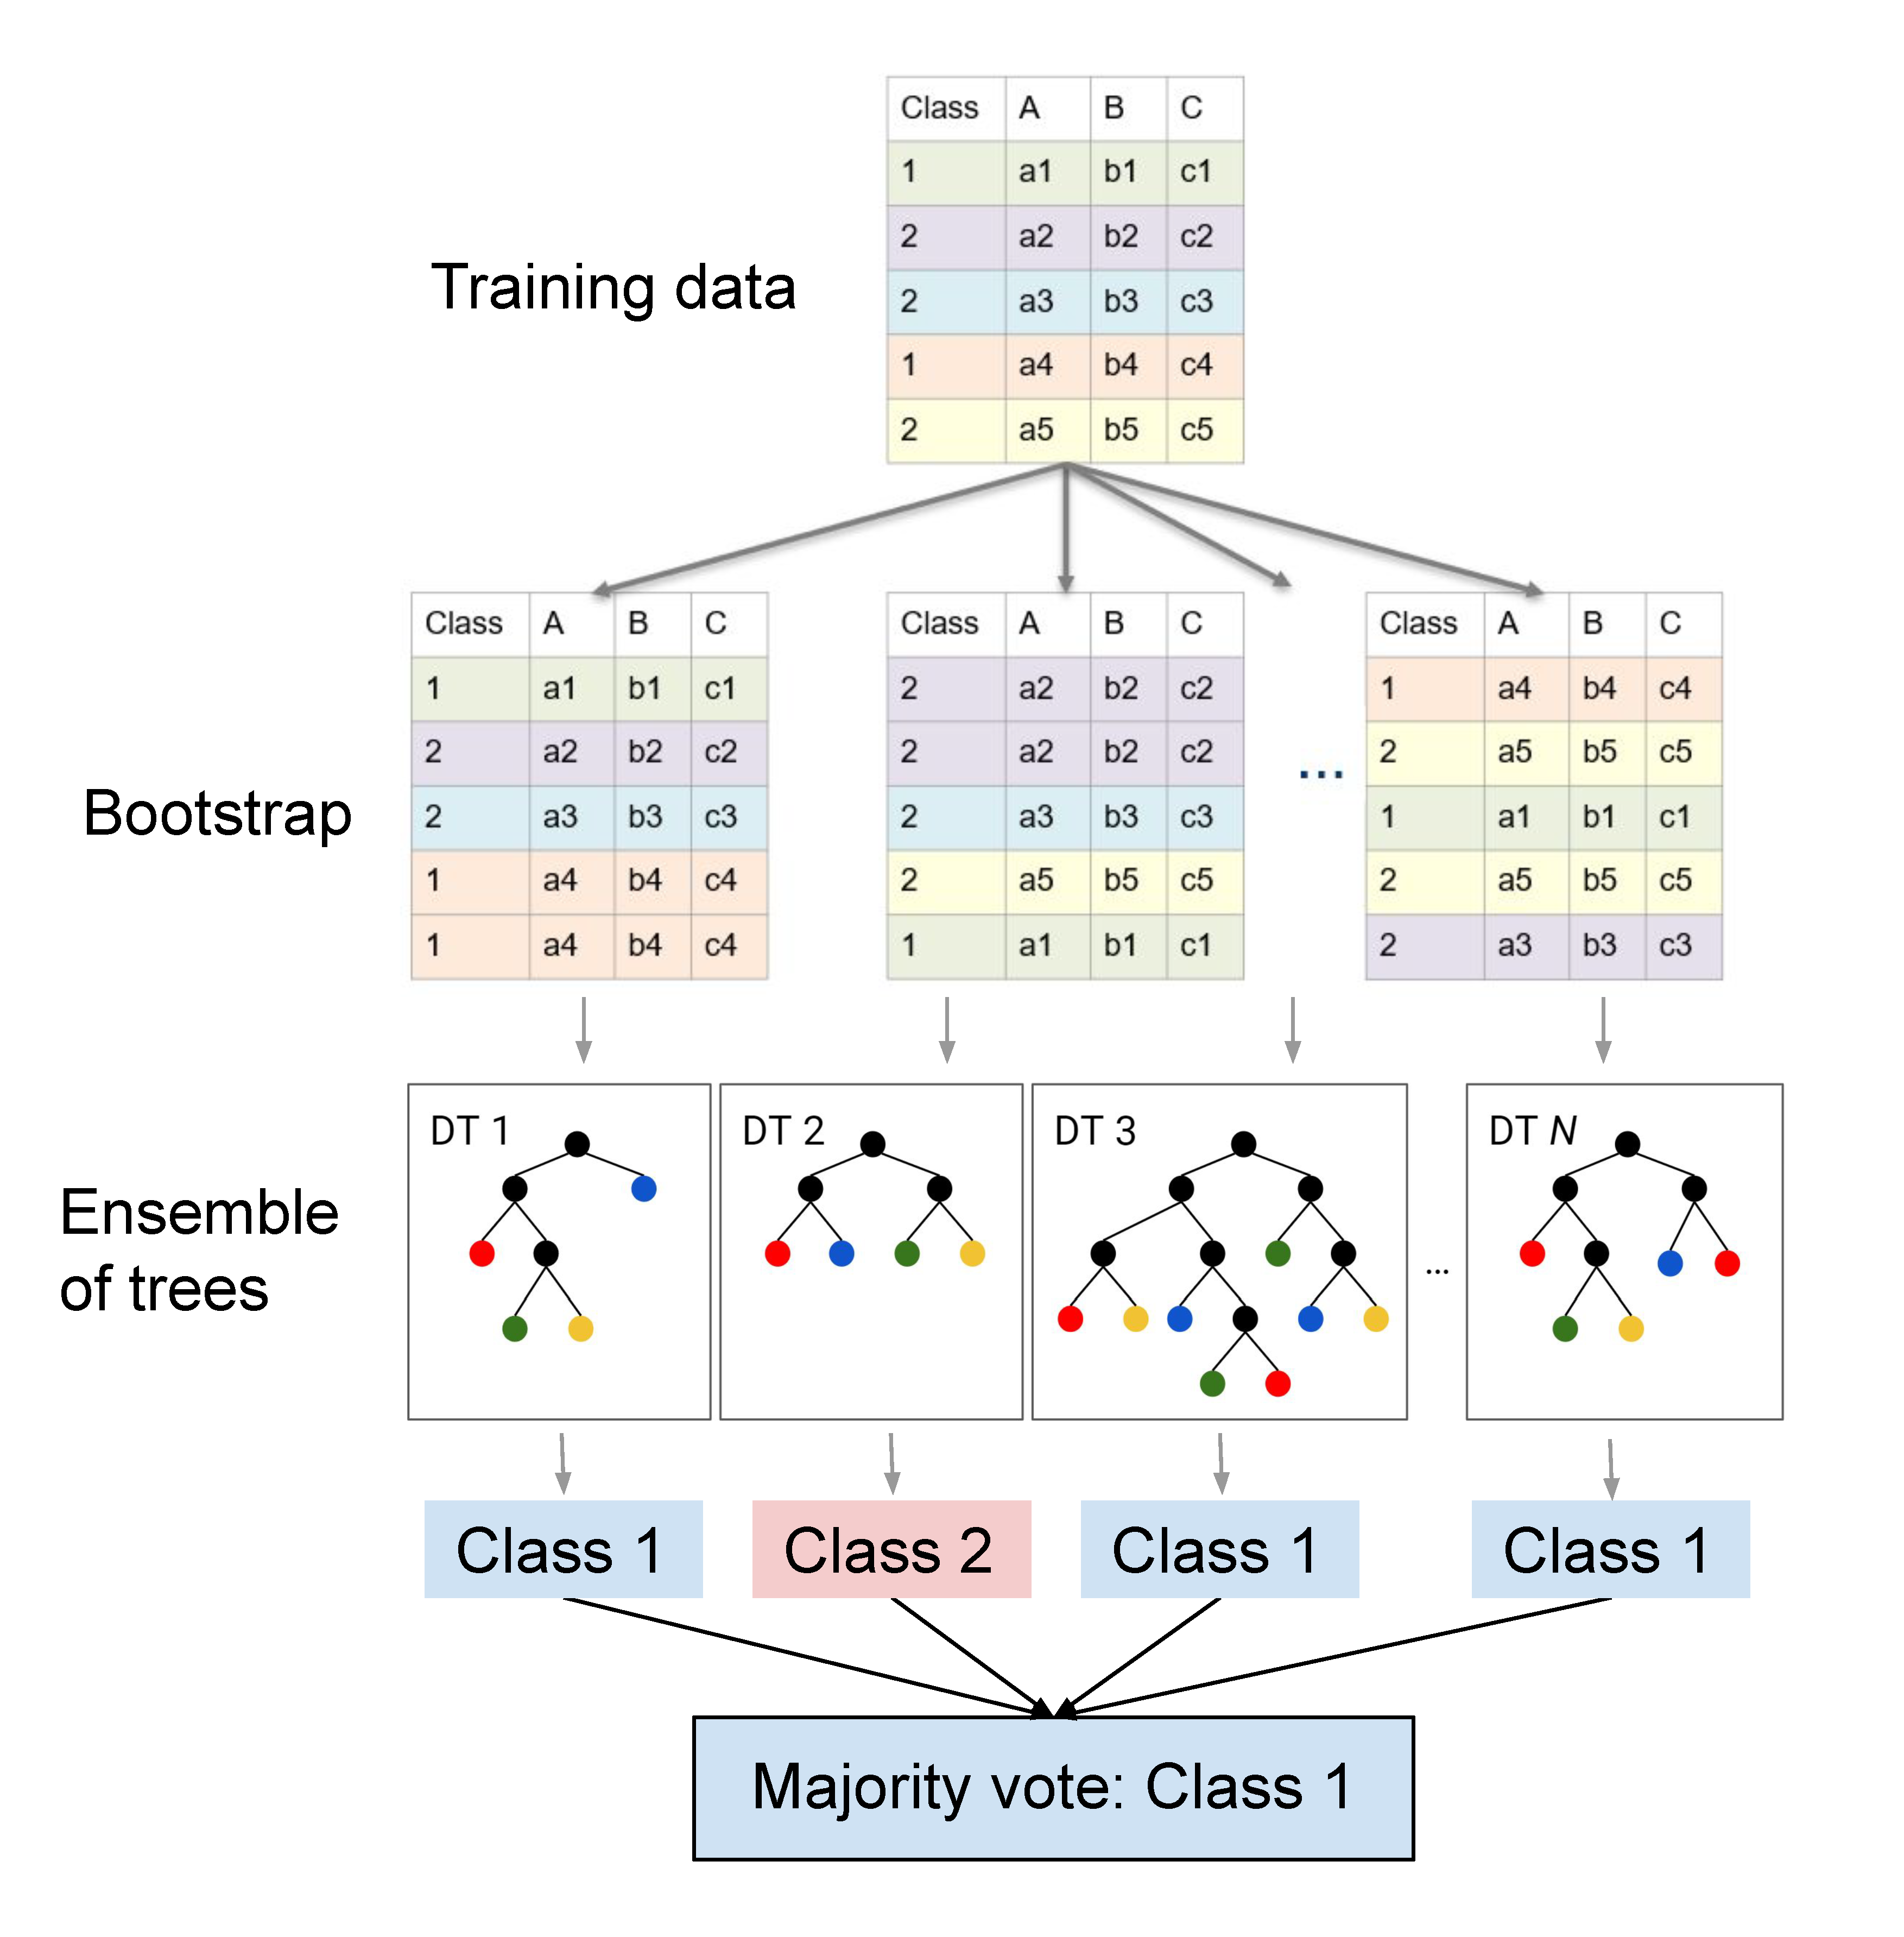
image source:https://pages.cms.hu-berlin.de/EOL/geo_rs/S08_Image_classification2.html

#### Steps Involved in Random Forest Classifier
1. **Bootstrap Sampling:**
   - Random Forest starts by performing bootstrap sampling; this means it creates multiple subsets of data from the original dataset, with replacement. Each subset of data is used to train a separate decision tree.

2. **Training Multiple Decision Trees:**
   - Each bootstrap sample is used to train a decision tree. When building these trees, Random Forest introduces additional randomness by selecting a random subset of features at each split decision, instead of considering every possible feature. This process is known as feature bagging or bootstrap aggregating.

3. **Feature Randomness:**
   - At each split in the decision tree, instead of searching for the most optimal split among all features, a random subset of features is selected, and the best split from this subset is used. This ensures that the trees are diverse and helps in reducing correlation among the trees, enhancing the overall model’s performance.

4. **Prediction:**
   - For classification tasks, once all the trees are built, the Random Forest aggregates the votes from different trees to decide the final class of the input sample. This majority vote approach is typically more robust than individual tree predictions.
   - For regression, it calculates the average of outputs by various trees.

5. **Model Tuning:**
   - Parameters such as the number of trees in the forest, the number of features to consider at each split, the maximum depth of each tree, and the minimum number of samples required to split a node can be adjusted to optimize performance.

6. **Validation:**
   - The performance of the model can be assessed using different metrics such as accuracy, precision, recall, and F1-score for classification tasks, or MSE (Mean Squared Error) and MAE (Mean Absolute Error) for regression tasks. Cross-validation techniques can also be employed to ensure that the model generalizes well to unseen data.

Random Forest is highly favored due to its simplicity, robustness, and good performance on many problems, including those with non-linear relationships and interactions. It is relatively immune to overfitting and can handle large datasets with high dimensionality effectively.

In [8]:
# Import Libraries and dataset
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import KFold, StratifiedKFold

In [10]:
dataframe = pd.read_csv("diabetes.csv")
dataframe

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1



#### **Overview of Pima Indian diabetes dataset**

-Preg	Number of times pregnant	Numeric	[0, 17]

-Gluc	Plasma glucose concentration at 2 Hours in an oral glucose tolerance test (GTIT)	Numeric	[0, 199]

-BP	Diastolic Blood Pressure (mm Hg)	Numeric	[0, 122]

-Skin	Triceps skin fold thickness (mm)	Numeric	[0, 99]

-Insulin	2-Hour Serum insulin (µh/ml)	Numeric	[0, 846]

-BMI	Body mass index [weight in kg/(Height in m)]	Numeric	[0, 67.1]

-DPF	Diabetes pedigree function	Numeric	[0.078, 2.42]

-Age	Age (years)	Numeric	[21, 81]

-Outcome	Binary value indicating non-diabetic /diabetic	Factor	[0,1]

In [12]:
# Random Forest Classification

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = dataframe.iloc[:,0:8]
Y = dataframe.iloc[:,8]

kfold = StratifiedKFold(n_splits=10,random_state= 3,shuffle=True) 

model = RandomForestClassifier(n_estimators= 200,random_state= 20,max_depth=None)
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print(results.mean())

[0.75324675 0.76623377 0.75324675 0.80519481 0.87012987 0.84415584
 0.74025974 0.68831169 0.72368421 0.77631579]
0.7720779220779221


### Hyper parameter tuning in Random Forest

Tuning a random forest model involves adjusting several parameters to optimize its performance for a specific dataset. Here are some key parameters that are often tuned:

1. **Number of Trees (`n_estimators`)**: This parameter specifies the number of trees in the forest. Generally, more trees increase the model's performance and robustness but also increase the computational cost and time.

2. **Maximum Depth of Trees (`max_depth`)**: This controls the maximum depth of each tree. Deeper trees can model more complex patterns but may lead to overfitting. Limiting the depth is a common method to prevent overfitting.

3. **Minimum Samples Split (`min_samples_split`)**: This parameter determines the minimum number of samples required to split an internal node. Higher values prevent the model from learning overly specific patterns, thus reducing overfitting.

4. **Minimum Samples Leaf (`min_samples_leaf`)**: It specifies the minimum number of samples a leaf node must have. Increasing this number can ensure that the trees in the forest are more generalized.

5. **Maximum Features (`max_features`)**: This parameter defines the number of features to consider when looking for the best split. Choices include a percentage of the total, square root, log2, and others. The right setting helps in making the model robust by reducing variance.

6. **Bootstrap (`bootstrap`)**: Indicates whether or not to use bootstrap sampling for building trees. If set to False, the whole dataset is used to build each tree. Setting it to True generally provides a better model as it reduces variance.

7. **Criterion (`criterion`)**: This is the function to measure the quality of a split. "Gini" for the Gini impurity and "entropy" for the information gain are commonly used. Choosing the right criterion depends on the problem at hand.

8. **Max Leaf Nodes (`max_leaf_nodes`)**: Limits the number of leaf nodes in each tree. Setting this parameter can control the complexity of the trees, with higher numbers allowing more complex trees.

9. **Class Weight (`class_weight`)**: Useful for imbalanced datasets, this parameter helps to adjust the weights that are assigned to different classes. By default, all classes are supposed to have equal weight, but sometimes it's beneficial to adjust these to reflect their real-world importance or frequency.

By carefully tuning these parameters based on cross-validation performance, one can significantly improve the effectiveness and efficiency of a random forest model.

#### Hyper parameter tuning using GridSearchCV

In [15]:
# Use Grid search CV to find best parameters (Hyper parameter tuning)
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,None],
    'min_samples_leaf': [5,10,20],
    'n_estimators': [50,100,200,500],
    'max_features':["sqrt","log2",None],
    'criterion':["gini","entropy"]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=10, scoring="accuracy")
grid_search.fit(X, Y)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='accuracy', verbose=10)

In [17]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'n_estimators': 100}
0.7826160767337238


In [19]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=None,
                       min_samples_leaf=5, n_jobs=-1, random_state=42)

In [9]:
# Plot the tree
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree
# plt.figure(figsize=(80,40))
# plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);


### Feature Selection using Random Forest

In [32]:
# Use best estimator hyper parameters obtained above to select important features

model_best = RandomForestClassifier(criterion='entropy', max_depth=5, max_features=None,
                       min_samples_leaf=5, n_jobs=-1, random_state=42)
model_best.fit(X,Y)
model_best.feature_importances_

array([0.04279647, 0.44093393, 0.0396377 , 0.0225074 , 0.0251669 ,
       0.21364299, 0.08380487, 0.13150974])

In [34]:
X = dataframe.iloc[:,0:8]
X.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')

In [43]:
df = pd.DataFrame(model_best.feature_importances_, columns = ["Importance score"],index = X.columns)
df.sort_values(by = "Importance score", inplace = True, ascending = False,)

<BarContainer object of 8 artists>

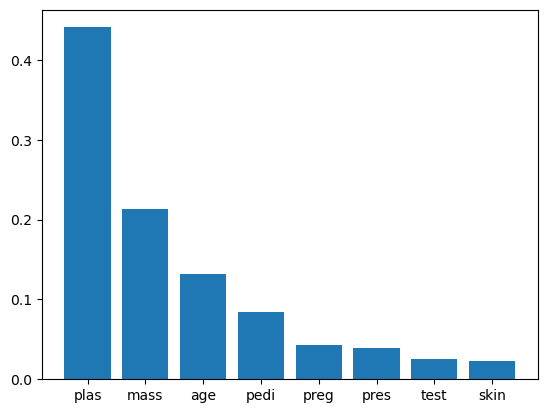

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.bar(df.index, df["Importance score"])

## Boosting Algorithm
Boosting is a powerful ensemble technique in machine learning used to improve the accuracy of classification models. It works by combining multiple weak learners (typically simple models) to create a strong, accurate predictor. Here's a breakdown of its principles and how it operates:

### Principle of Boosting

1. **Combining Weak Learners**: Boosting starts with the premise that combining multiple weak learners can produce a strong learner. A weak learner is defined as any model that performs slightly better than random guessing. For example, in a binary classification problem, a weak learner might achieve slightly over 50% accuracy.

2. **Iterative Learning**: Unlike other ensemble methods that build models in parallel (like Random Forests), boosting builds models sequentially. Each subsequent model is trained on the errors of the previous models. This iterative process helps to focus more on the difficult cases that previous models misclassified.

3. **Weighted Training**: In boosting, each training instance is assigned a weight that indicates how important it is to classify it correctly. Initially, all instances might have the same weight, but as training progresses, the algorithm increases the weights of misclassified instances. This makes the model focus more on the harder cases in subsequent iterations.

4. **Error Correction**: Each new model in the sequence focuses on correcting the mistakes made by the previous models. The idea is to continuously reduce bias and variance in the combined model by focusing on the parts of the training data where the current ensemble performs poorly.

### Types of Boosting Algorithms

Some of the most popular boosting algorithms include:

- **AdaBoost (Adaptive Boosting)**: The first real boosting algorithm, which adjusts the weights of incorrectly classified instances so that subsequent classifiers focus more on difficult cases.

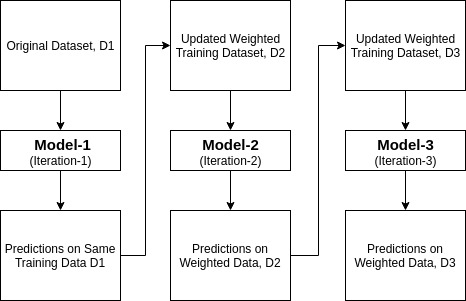
                image source: https://www.datacamp.com/tutorial/adaboost-classifier-python



- **Gradient Boosting**: Builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage, regression trees are fitted on the negative gradient of the loss function used in a classification or regression problem.

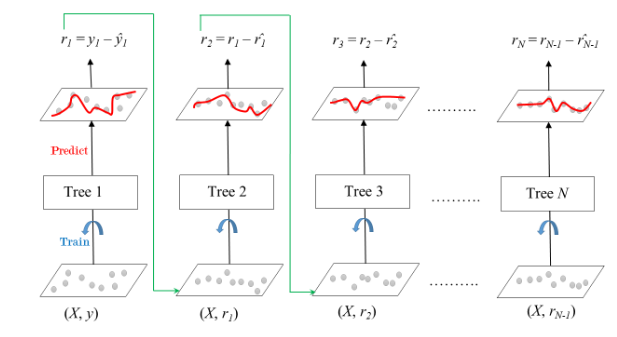
image source: https://media.geeksforgeeks.org/wp-content/uploads/20200721214745/gradientboosting.PNG

- **XGBoost (Extreme Gradient Boosting)**: An optimized distributed gradient boosting library designed to be highly efficient, flexible, and portable. It implements machine learning algorithms under the Gradient Boosting framework.
- **LightGBM (Light Gradient Boosting Machines)**: Similar to XGBoost, LightGBM is based on the GBDT framework but with improvements in the training algorithm.

### Applications

Boosting algorithms are widely used for various classification problems, including credit scoring, medical diagnosis, and customer churn prediction. They are highly appreciated for their accuracy, especially in contexts where prediction performance is critical.

In essence, boosting improves the predictive strength of a model by focusing iteratively on the most challenging parts of the dataset and reducing the overall model error incrementally through each iteration.

### Hyperparameter tuning
Tuning an AdaBoost classifier involves adjusting several key parameters to optimize the model's performance. Here are the most important parameters you'll typically consider when tuning an AdaBoost classifier:

1. **Base Estimator**: AdaBoost can be used with any machine learning algorithm as a base estimator, though it's most commonly used with decision trees (specifically, decision stumps, which are trees with a single split). The choice and complexity of the base estimator can significantly affect the performance of the AdaBoost model.

2. **Number of Estimators (n_estimators)**: This parameter controls the maximum number of weak learners (base estimators) that are allowed to be built. A higher number of estimators can improve the model’s performance but also increases the risk of overfitting. Typically, you need to balance between accuracy and overfitting when setting this parameter.

3. **Learning Rate**: This parameter scales the contribution of each classifier. There is a trade-off between the learning rate and the number of estimators, as a smaller learning rate might require more estimators but can lead to better overall performance. Lower learning rates are generally paired with more estimators.


In [14]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import plot_tree

filename = 'https://raw.githubusercontent.com/slmsshk/pima-indians-diabetes.data.csv/main/pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]
dataframe

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [23]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [19]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True) 
model = AdaBoostClassifier(n_estimators=50, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print(results.mean())

[0.74025974 0.75324675 0.71428571 0.83116883 0.77922078 0.79220779
 0.7012987  0.81818182 0.81578947 0.77631579]
0.7721975393028024


### Implementation of Gradient Boosting Classifier


In [20]:
from sklearn.ensemble import GradientBoostingClassifier
kfold = KFold(n_splits=10, random_state=7,shuffle=True) 
model = GradientBoostingClassifier(n_estimators=200, max_depth = 5, random_state=7, max_features=0.6)
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print(results.mean())

[0.74025974 0.76623377 0.67532468 0.75324675 0.76623377 0.79220779
 0.68831169 0.79220779 0.80263158 0.75      ]
0.7526657552973343


### Stacking Classifier

Stacking (also known as stacked generalization) is an ensemble machine learning algorithm. It involves combining multiple classification models via a meta-classifier. The base level models are trained based on a complete training set, then a meta-model is trained on the outputs of the base models as features. The idea behind stacking is to use the strengths of multiple models to improve the accuracy of predictions. Here’s how it typically works:

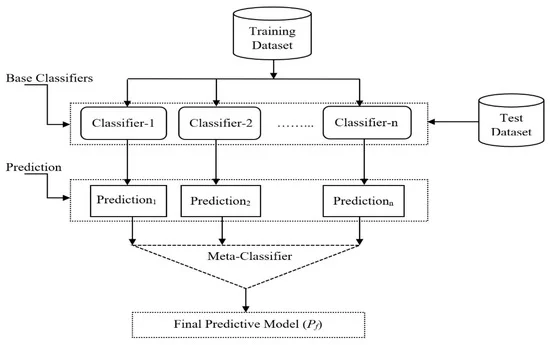
image source: https://www.mdpi.com/2071-1050/14/21/13998,
Sustainability 2022, 14(21), 13998; https://doi.org/10.3390/su142113998, 

1. **Split the Training Data**: First, you divide the original training dataset into two disjoint sets. One set is used to train the base models.

2. **Train Base Models**: Several different classifiers (such as decision trees, SVM, logistic regression, etc.) are trained independently on the first part of the dataset.

3. **Make Predictions**: Each base model makes predictions on the second part of the dataset (not seen by the models during training). These predictions are used as the inputs (along with the original features, in some cases) for the next layer.

4. **Train Meta-Model**: A new model, often called the meta-model or meta-classifier, is then trained on this new dataset, which is composed of the predictions of the base models as features. The target output remains the same.

5. **Final Model**: This stacked model (the combination of base models and a meta-model) is used to make predictions on new data.

The main hypothesis is that the meta-model will learn the best way to combine the predictions of the base models. By doing so, it can correct errors made by individual base models and usually achieve better performance than any single one of the base classifiers. Stacking is often used in machine learning competitions to achieve high scores.

In [4]:
# Stacking Ensemble for Classification
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier 
from sklearn.ensemble import VotingClassifier

filename = 'https://raw.githubusercontent.com/slmsshk/pima-indians-diabetes.data.csv/main/pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [5]:
dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=200)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('decision_tree', model2))
model3 = SVC()
estimators.append(('svm', model3))

In [7]:
estimators

[('logistic', LogisticRegression(max_iter=200)),
 ('decision_tree', DecisionTreeClassifier()),
 ('svm', SVC())]

In [8]:
# create the ensemble model
ensemble = VotingClassifier(estimators)
results_voting = cross_val_score(ensemble, X, Y, cv=kfold)

In [9]:
results_voting

array([0.84415584, 0.75324675, 0.74025974, 0.81818182, 0.79220779,
       0.77922078, 0.63636364, 0.79220779, 0.80263158, 0.76315789])

In [10]:
print(results_voting.mean())

0.7721633629528366


In [13]:
# Meta Classifier
from sklearn.svm import SVC

clf = SVC()
stack = StackingClassifier(estimators,final_estimator=clf)
results_stacking = cross_val_score(stack, X, Y, cv=kfold)
print(results_stacking.mean())

0.7656527682843474
